In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

tf.test.is_gpu_available()

2.0.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


False

In [10]:
A = [1,4,6,7,9,46,5,68]
B = A[:2]
print(B)
C = A[2:]
print(C)

[1, 4]
[6, 7, 9, 46, 5, 68]


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:] # 前5000当验证集，后面55000当训练集
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


(28, 28)


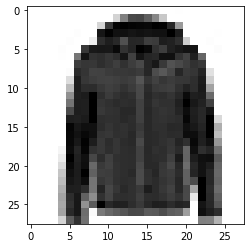

In [13]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()
print(x_train[0].shape)
show_single_image(x_train[0])

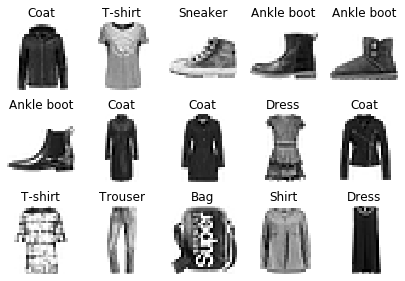

In [15]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    # n_rows 行数，n_cols列数
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6)) # 定义一张大图
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col # 每一行的个数 * 前面的行数 + 在当前行的列数 = 在所有图片中对应的索引位置
            plt.subplot(n_rows,n_cols,index+1) # 画一张子图
            plt.imshow(x_data[index],cmap='binary',
                       interpolation= 'nearest') # interpolation插值使用最近的像素点进行插值
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal',
               'Shirt','Sneaker','Bag','Ankle boot'] # 每一个类别索引对应的服饰的名称
show_imgs(3,5,x_train,y_train,class_names)

In [2]:
pow(28,2)

784

In [5]:
# tf.keras.models.Sequential()
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300,activation="relu"))
# model.add(keras.layers.Dense(100,activation="relu"))
# model.add(keras.layers.Dense(10,activation="softmax"))

# model 的另外一种写法
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

optimizer = keras.optimizers.Adam()
# 如果y是是一个one-hot向量，那么使用“categorical_crossentropy”，如果y是一个数，那么使用"sparse_categorical_crossentropy"
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = optimizer,
              metrics = ["accuracy"])

In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 开始训练
history = model.fit(x_train,y_train,epochs=10,
          validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 55us/sample - loss: 2.4869 - accuracy: 0.6995 - val_loss: 0.7465 - val_accuracy: 0.7504
Epoch 2/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.6667 - accuracy: 0.7661 - val_loss: 0.7028 - val_accuracy: 0.7918
Epoch 3/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.5619 - accuracy: 0.8005 - val_loss: 0.5041 - val_accuracy: 0.8232
Epoch 4/10
55000/55000 [==============================] - 3s 47us/sample - loss: 0.4825 - accuracy: 0.8299 - val_loss: 0.4673 - val_accuracy: 0.8290
Epoch 5/10
55000/55000 [==============================] - 3s 47us/sample - loss: 0.4566 - accuracy: 0.8392 - val_loss: 0.5281 - val_accuracy: 0.8220
Epoch 6/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.4238 - accuracy: 0.8509 - val_loss: 0.4204 - val_accuracy: 0.8588
Epoch 7/10
55000/55000 [==============================] -

In [11]:
history.history

{'loss': [2.4868790656263178,
  0.6667292632969943,
  0.5618531569220803,
  0.48251173165494743,
  0.45656982915618205,
  0.4237898981614546,
  0.39786179040562025,
  0.3881938664349643,
  0.3647612562569705,
  0.3586367839943279],
 'accuracy': [0.69954544,
  0.7660909,
  0.80047274,
  0.8298909,
  0.8392,
  0.85089093,
  0.86030906,
  0.86276364,
  0.87201816,
  0.8753818],
 'val_loss': [0.7465374733924866,
  0.7028321825027466,
  0.5041274455308914,
  0.4672816999912262,
  0.5281052861452102,
  0.4203762784481049,
  0.4324809201002121,
  0.43412167035341265,
  0.4367948884695768,
  0.39052639623880386],
 'val_accuracy': [0.7504,
  0.7918,
  0.8232,
  0.829,
  0.822,
  0.8588,
  0.8446,
  0.8502,
  0.8592,
  0.872]}

In [30]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.594871,0.750855,0.579322,0.8076
1,0.535218,0.813709,0.484338,0.8448
2,0.469997,0.835436,0.469444,0.8460
3,0.438455,0.843964,0.421672,0.8582
4,0.432395,0.848727,0.416539,0.8536
5,0.403767,0.857473,0.423862,0.8686
6,0.395030,0.860418,0.405578,0.8638
7,0.377147,0.866818,0.404024,0.8692
8,0.366594,0.869345,0.405732,0.8556
9,0.356675,0.873527,0.472332,0.8542


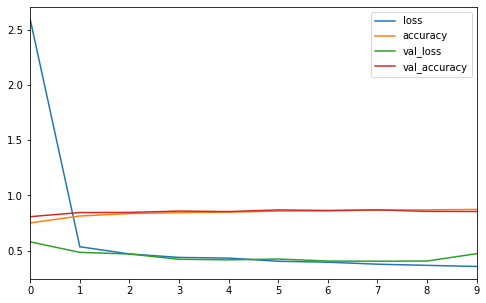

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))

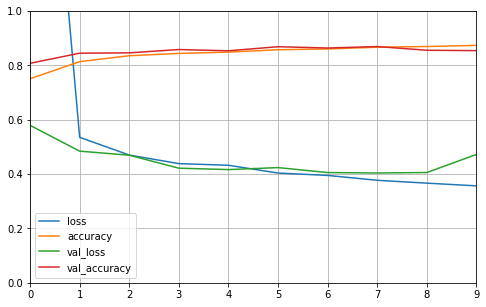

In [32]:
# 把值的变化过程打印出来
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)